In [2]:
# EDA 사전 세팅
%matplotlib inline

import time
import os
import openai

os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
sns.set(font="AppleGothic",

        rc={"axes.unicode_minus":False},
        
        style='darkgrid')

In [4]:
data = pd.read_csv('/Users/choejeehyuk/DNA/📞데이콘 Basic 전화 해지 여부 분류 AI 경진대회/train.csv')
sub = pd.read_csv('/Users/choejeehyuk/DNA/📞데이콘 Basic 전화 해지 여부 분류 AI 경진대회/sample_submission.csv')
t_data = pd.read_csv('/Users/choejeehyuk/DNA/📞데이콘 Basic 전화 해지 여부 분류 AI 경진대회/test.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [6]:
data.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [8]:
data.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


In [9]:
t_data.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
count,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000
mean,159.776713,12.312756,251.066221,159.761724,40.887059,263.656424,159.628216,25.440460,264.052963,157.692112,12.095035,2.301476
std,118.383432,28.069438,85.236623,103.648878,23.062830,75.232035,103.417132,8.288719,74.877379,101.640429,9.459368,2.058855
min,2.000000,0.000000,0.200000,0.000000,0.100000,0.200000,0.000000,0.000000,21.300000,20.000000,2.000000,0.000000
25%,63.000000,0.000000,222.700000,88.000000,24.400000,223.800000,87.000000,22.220000,223.700000,86.000000,4.880000,2.000000
50%,119.000000,1.000000,234.000000,115.000000,30.800000,242.700000,113.000000,23.300000,242.800000,111.000000,9.060000,2.000000
75%,228.000000,22.000000,289.800000,223.000000,45.900000,290.350000,223.000000,28.820000,290.700000,223.000000,20.290000,2.000000
max,2212.000000,1112.000000,481.800000,489.000000,118.100000,481.500000,490.000000,49.990000,481.700000,489.000000,44.980000,11.000000


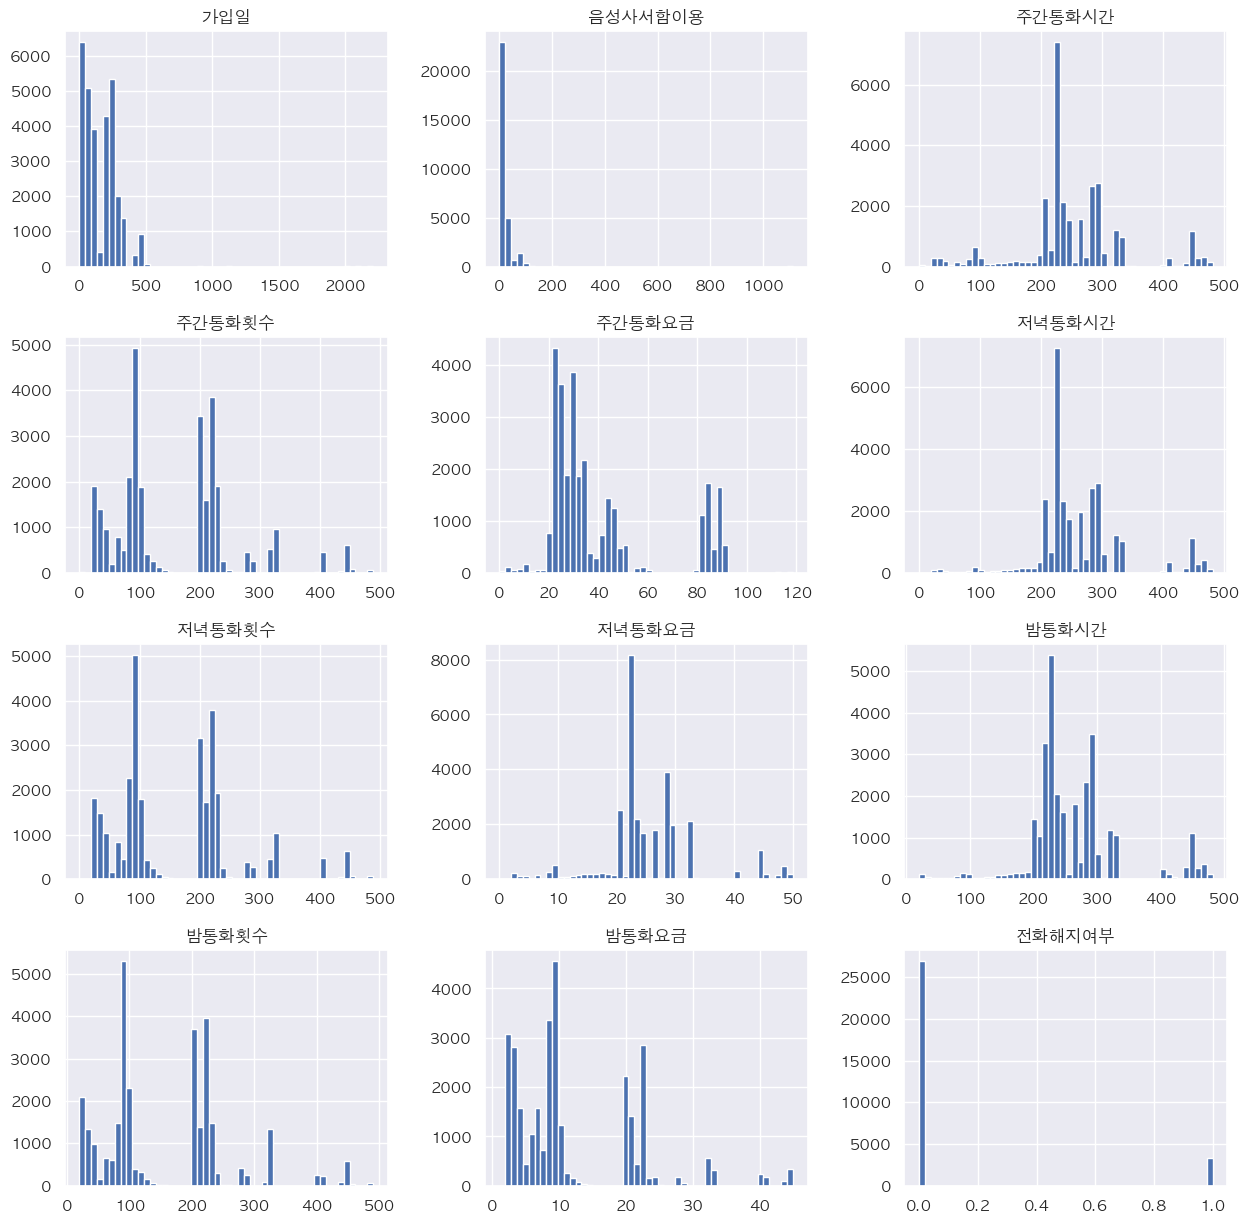

In [15]:
data.drop(['상담전화건수'], axis=1).hist(bins=50, figsize=(15, 15))
plt.show()

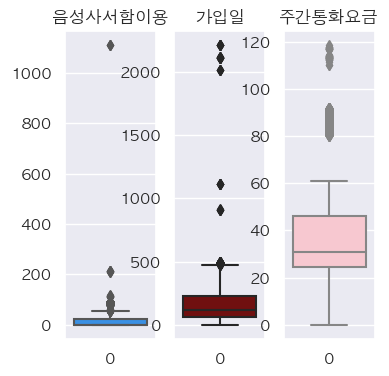

In [23]:
fig, ax = plt.subplots(1,3,figsize=(4, 4))
sns.boxplot(data['음성사서함이용'], ax=ax[0], color = 'dodgerblue')
ax[0].set_title('음성사서함이용')
sns.boxplot(data['가입일'], ax=ax[1], color='maroon')
ax[1].set_title('가입일')
sns.boxplot(data['주간통화요금'], ax=ax[2], color='pink')
ax[2].set_title('주간통화요금')
plt.show()

In [24]:
for i in range(len(ax)):
    whiskers = ax[i].lines[2:4]
    for whisker in whiskers:
        y_data = whisker.get_ydata()
        print(f"Whisker y-values for subplot {i+1}: {y_data}")

Whisker y-values for subplot 1: [0. 0.]
Whisker y-values for subplot 1: [55. 55.]
Whisker y-values for subplot 2: [1. 1.]
Whisker y-values for subplot 2: [475. 475.]
Whisker y-values for subplot 3: [0. 0.]
Whisker y-values for subplot 3: [61.1 61.1]


In [26]:
data.loc[data['가입일'] > 475, '가입일'] = 475
data.loc[data['음성사서함이용'] > 55, '음성사서함이용'] = 55

<Axes: >

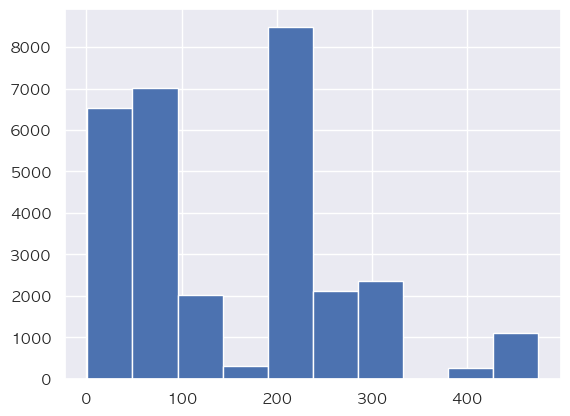

In [29]:
data['가입일'].hist()

<Axes: >

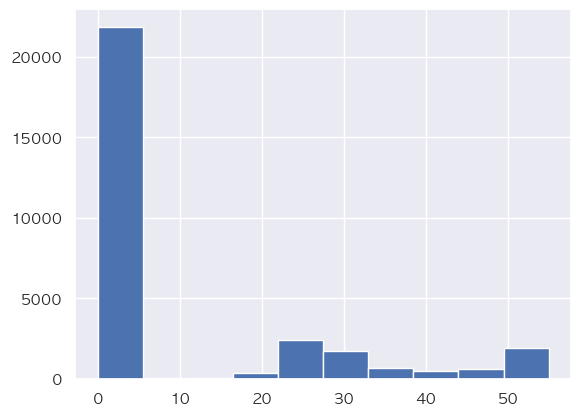

In [30]:
data['음성사서함이용'].hist()

/var/folders/fs/kl20xgn54d3bgs5lpqcv3b_00000gn/T/ipykernel_1695/3706941625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

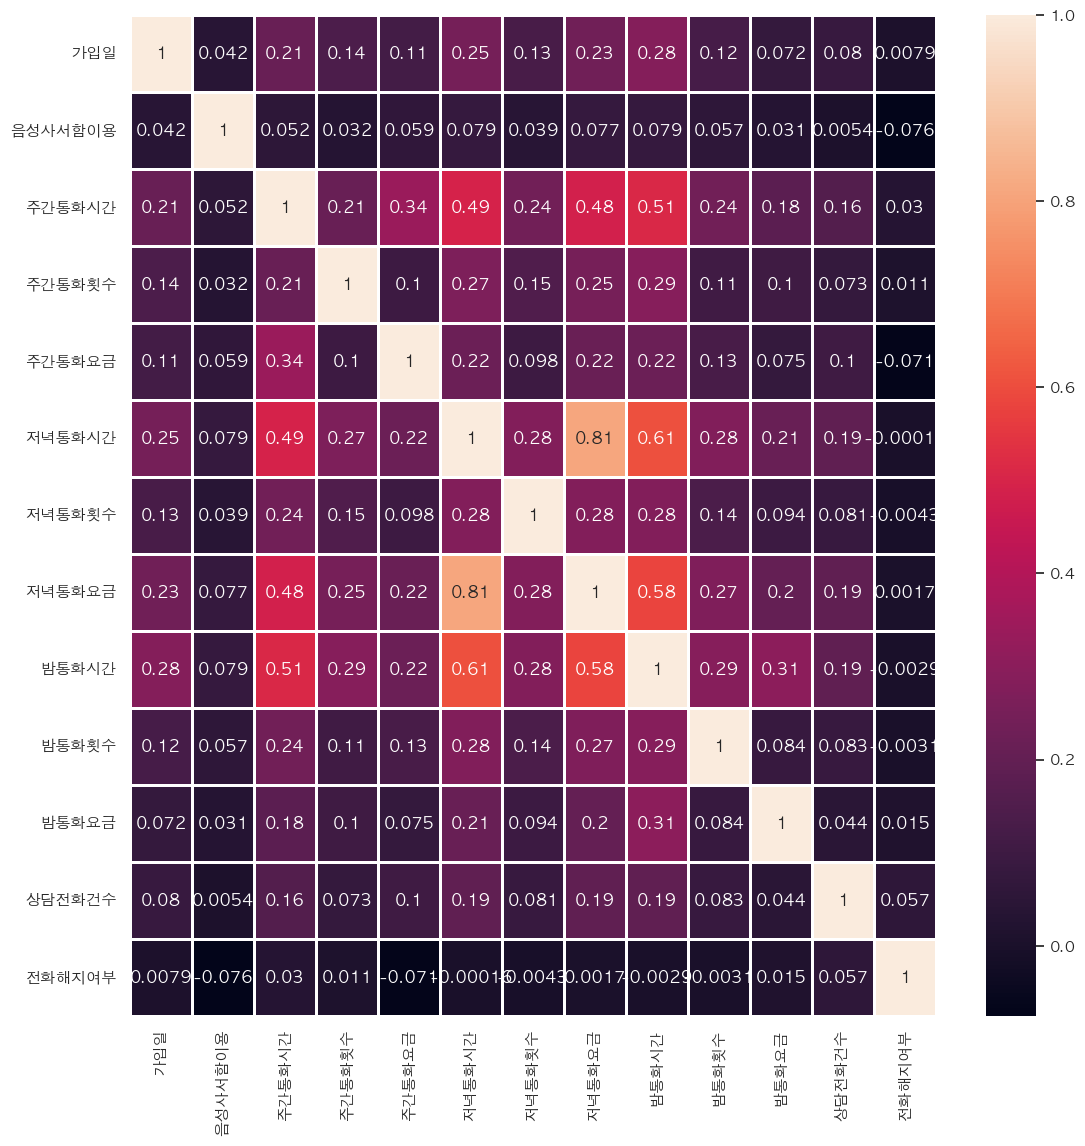

In [38]:
corr_matrix = data.corr()
plt.figure(figsize=(13, 13))
sns.heatmap(corr_matrix, annot=True, linewidth=1)